## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Airbnb Bookings Analysis - Capstone Project/Airbnb NYC 2019.csv'
airbnb_df = pd.read_csv(file_path)

In [ ]:
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
airbnb_df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


# **Data Cleaning and Exploration** 



In [ ]:
#Checking number of null values in each column
airbnb_df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
airbnb_df = airbnb_df.drop('id', axis=1)

In [ ]:
airbnb_df['name'].fillna('Others', inplace=True)
airbnb_df['host_name'].fillna('Name_Not_Available', inplace=True)
airbnb_df['reviews_per_month'].fillna(0, inplace=True)
airbnb_df['last_review'].fillna('Not_Available', inplace=True)

In [ ]:
#Checking number of null values in each column after data cleaning
airbnb_df.isna().sum()

name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
# shape of dataframe
airbnb_df.shape

(48895, 15)

In [ ]:
# basic info of each column, non null count and datatype
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48895 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48895 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  last_review                     48895 non-null  object 
 12  reviews_per_month               

In [ ]:
# description of object type columns
airbnb_df.describe(include='object')

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48895,48895,48895,48895,48895,48895
unique,47906,11453,5,221,3,1765
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,Not_Available
freq,18,417,21661,3920,25409,10052


In [ ]:
# description of non object type columns
airbnb_df.describe(exclude='object')

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# **Exploratory Data Analysis**

### Learning about different hosts and areas

In [ ]:
# counts of unique values in neighbourhood_group column
airbnb_df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

Dataset has the Airbnb data for 5 neighbourhood group areas:

*   Manhattan
*   Brooklyn
*   Queens
*   Bronx
*   Staten Island 





 

### **Top 10 listed hosts**

In [ ]:
# airbnb_df_hosts dataframe created  with groupby function on host_name and neighbourhood_group with max() on calculated_host_listings_count
airbnb_df_hosts = airbnb_df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
airbnb_df_hosts = airbnb_df_hosts.sort_values(by='calculated_host_listings_count',ascending=False, ignore_index=True)

airbnb_df_hosts.head(10)

,host_name,neighbourhood_group,calculated_host_listings_count
0,Sonder (NYC),Manhattan,327
1,Blueground,Manhattan,232
2,Blueground,Brooklyn,232
3,Kara,Manhattan,121
4,Kazuya,Queens,103
5,Kazuya,Manhattan,103
6,Kazuya,Brooklyn,103
7,Sonder,Manhattan,96
8,Jeremy & Laura,Manhattan,96
9,Corporate Housing,Manhattan,91


So, Host Sonder(NYC) have the most listings and these listings are in Manhattan area.

### **Number of Airbnb in each neighbourhood**

In [ ]:
# num_of_airbnb dataframe created with groupby function on neighbourhood_group with count() on room_type
num_of_airbnb = airbnb_df.groupby(['neighbourhood_group'])['room_type'].count().reset_index()
num_of_airbnb = num_of_airbnb.rename(columns={'room_type':'number_of_airbnb'})
num_of_airbnb = num_of_airbnb.sort_values(by='number_of_airbnb',ascending=False)
num_of_airbnb

,neighbourhood_group,number_of_airbnb
2,Manhattan,21661
1,Brooklyn,20104
3,Queens,5666
0,Bronx,1091
4,Staten Island,373


We get the number of Airbnb in each neighbourhood group areas.

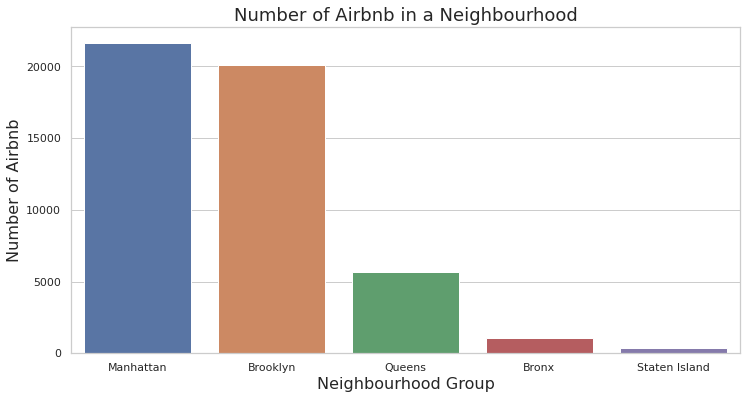

In [ ]:
# Plotting a bar plot for count of number of Airbnb in all Neighbourhood group areas
plt.figure(figsize=(12,6))
sns.set(style='whitegrid')
fig = sns.barplot(x='neighbourhood_group',y='number_of_airbnb',data=num_of_airbnb)
plt.xlabel("Neighbourhood Group",fontsize=16)
plt.ylabel("Number of Airbnb",fontsize=16)
plt.title("Number of Airbnb in a Neighbourhood",fontsize=18)

plt.show()

We can observe from the bar plot that Manhattan has the most number of Airbnb available followed by Brooklyn.

> Indented block



Getting the number of Airbnb in each neighbourhood along with room type.

In [ ]:
# num_of_room_type dataframe created for getting the number of Airbnb of various Room Types available in each neighbourhood group
num_of_room_type = pd.DataFrame(airbnb_df.groupby('neighbourhood_group')['room_type'].value_counts())
num_of_room_type

room_type
neighbourhood_group room_type                 
Bronx               Private room           652
                    Entire home/apt        379
                    Shared room             60
Brooklyn            Private room         10132
                    Entire home/apt       9559
                    Shared room            413
Manhattan           Entire home/apt      13199
                    Private room          7982
                    Shared room            480
Queens              Private room          3372
                    Entire home/apt       2096
                    Shared room            198
Staten Island       Private room           188
                    Entire home/apt        176
                    Shared room              9

**Availability of Airbnb in a year for different neighbourhood groups**

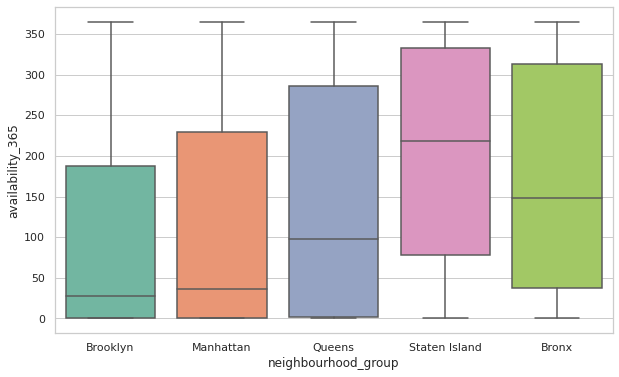

In [ ]:
# Boxplot for airbnb availability for different neighbourhood groups
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=airbnb_df, x='neighbourhood_group',y='availability_365',palette='Set2')

### Learning from predictions (ex: locations, prices, reviews, etc)

### Listed Airbnb Locations

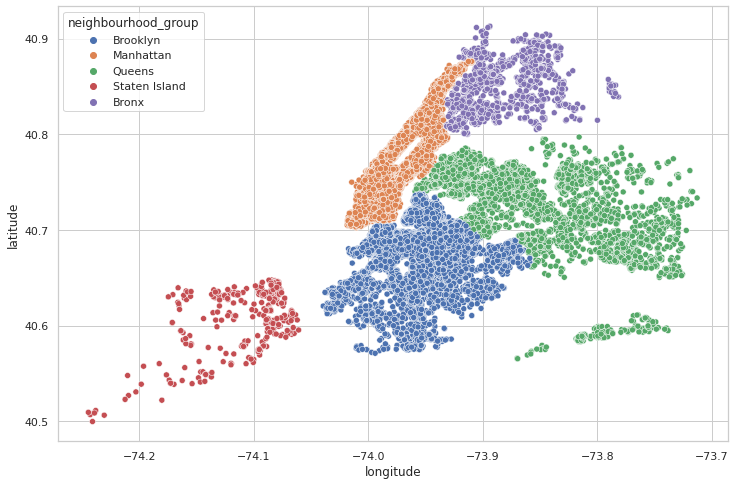

In [ ]:
# scatter plot for displaying the location of Airbnb in neighbourhood groups
plt.figure(figsize=(12,8))
sns.scatterplot(data= airbnb_df, x='longitude',y='latitude',hue='neighbourhood_group')
plt.show()

In [ ]:
# for displaying more detailed map locations, plotly.express as px is imported, colors are based on the room type
import plotly.express as px
fig = px.scatter_mapbox(airbnb_df, lat='latitude', lon='longitude', width=900, height=600, color="room_type", hover_data=["price"], mapbox_style="open-street-map")
fig.show()

### Reviews in each neighbourhood group

In [ ]:
# number_of_reviews dataframe is created with groupby on neighbourhood_group with max() on number of reviews. 
number_of_reviews = airbnb_df.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index()
number_of_reviews.sort_values(by='number_of_reviews',ascending=False)

,neighbourhood_group,number_of_reviews
3,Queens,629
2,Manhattan,607
1,Brooklyn,488
4,Staten Island,333
0,Bronx,321


We get the number of reviews in each, from this we can get idea that as Queens has most reviews so most visitors in Queens followed by Manhattan.

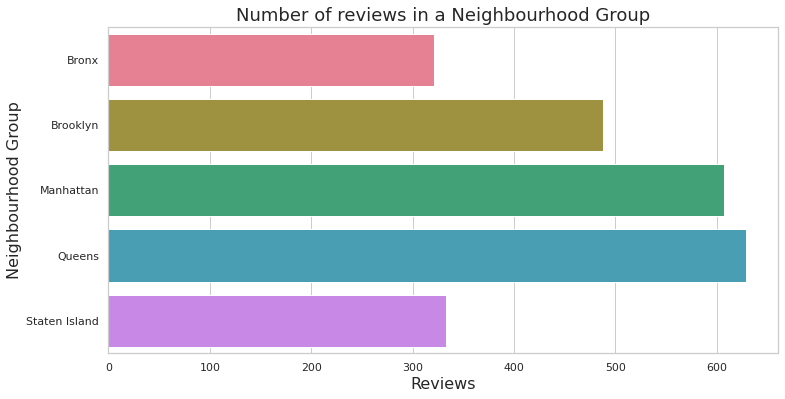

In [ ]:
# Plotting a bar plot for count of number of reviews in each Neighbourhood Group
neighbourhoods = number_of_reviews['neighbourhood_group']
reviews = number_of_reviews['number_of_reviews']

plt.figure(figsize=(12,6))
fig = sns.barplot(y=neighbourhoods,x=reviews,data=number_of_reviews, palette='husl')
plt.xlabel("Reviews",fontsize=16)
plt.ylabel("Neighbourhood Group",fontsize=16)
plt.title("Number of reviews in a Neighbourhood Group",fontsize=18)

plt.show()

### Airbnb property highest price per night in each neighbourhood group

In [ ]:
# maximum_price dataframe  gives the maximum labeled price for Airbnb available in different naighbouthood group
maximum_price = airbnb_df[airbnb_df['minimum_nights']==1].groupby(['neighbourhood_group'])['price'].max().reset_index().sort_values(by=['price'])
maximum_price.head(10)

,neighbourhood_group,price
0,Bronx,1000
3,Queens,2000
4,Staten Island,5000
2,Manhattan,7703
1,Brooklyn,8000


We can plot a barplot for better understanding Price against neighbourhood groups.

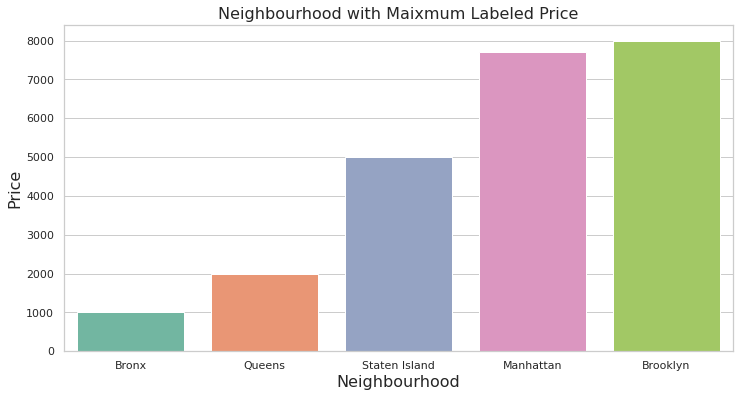

In [ ]:
# Plotting a bar plot for maximum price in each Neighbourhood Group
location = maximum_price['neighbourhood_group']
price = maximum_price['price']
plt.figure(figsize=(12,6))
fig = sns.barplot(x=location,y=price,data=maximum_price, palette='Set2')
plt.xlabel("Neighbourhood",fontsize=16)
plt.ylabel("Price",fontsize=16)
plt.title("Neighbourhood with Maixmum Labeled Price",fontsize=16)

plt.show()

We can observe from the above bar plot that Brooklyn and Manhattan neighbourhood groups has maximum price tag on Airbnb and the staten island has low price as compared to Brooklyn and Manhattan.



### Airbnb lowest price per night in each neighbourhood group

In [ ]:
# gorupby on neighbourhood group with min() on minimum_nights and price
airbnb_df.groupby('neighbourhood_group')[['minimum_nights','price']].min()


,minimum_nights,price
neighbourhood_group,,
Bronx,1,0
Brooklyn,1,0
Manhattan,1,0
Queens,1,10
Staten Island,1,13


Bronx, Brooklyn and Manhattan has lowest price airbnb as zero even when minimum nights is 1, this could be a wrong data entry and we are looking for non zero price, so we use condition filtering to get non zero price values.

In [ ]:
# airbnb_df['price']>0 filters all the non zero rows in price column
min_price_airbnb = airbnb_df[airbnb_df['price']>0].groupby('neighbourhood_group')[['minimum_nights','price']].min().reset_index()
min_price_airbnb

,neighbourhood_group,minimum_nights,price
0,Bronx,1,10
1,Brooklyn,1,10
2,Manhattan,1,10
3,Queens,1,10
4,Staten Island,1,13


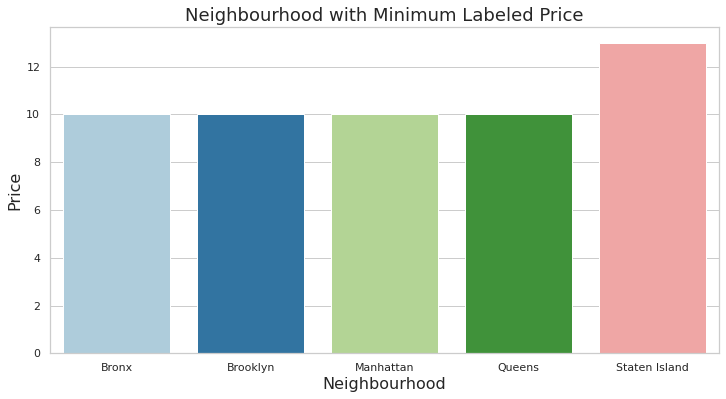

In [ ]:
# Plotting a bar plot for minimum price in each Neighbourhood Group
location = min_price_airbnb['neighbourhood_group']
price = min_price_airbnb['price']

plt.figure(figsize=(12,6))
fig = sns.barplot(x=location,y=price,data=min_price_airbnb, palette='Paired')
plt.xlabel("Neighbourhood",fontsize=16)
plt.ylabel("Price",fontsize=16)
plt.title("Neighbourhood with Minimum Labeled Price",fontsize=18)

plt.show()

### Comparison of number of reviews with the price for different neighbourhood groups

In [ ]:
price_area = airbnb_df.groupby(['price'])[['number_of_reviews', 'neighbourhood_group']].max().reset_index()
price_area

,price,number_of_reviews,neighbourhood_group
0,0,95,Manhattan
1,10,93,Queens
2,11,113,Queens
3,12,8,Queens
4,13,9,Staten Island
...,...,...,...
669,7703,0,Manhattan
670,8000,1,Brooklyn
671,8500,2,Manhattan
672,9999,6,Manhattan


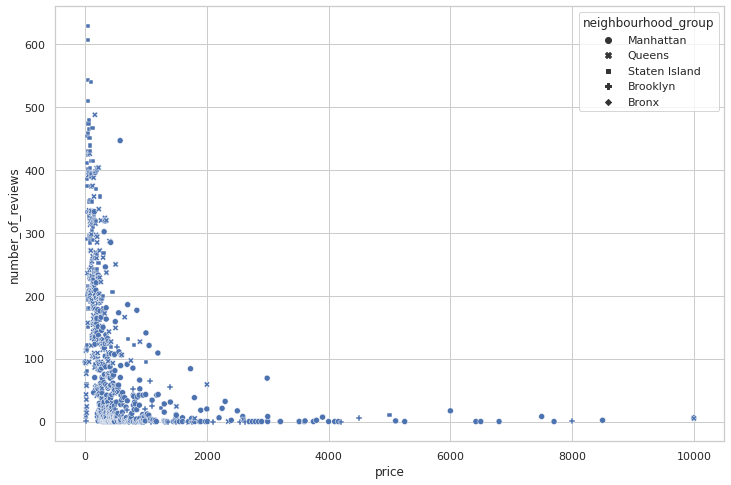

In [ ]:
# Plotting a scatter plot for comparison of number of reviews with the price
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='number_of_reviews',data=price_area, style='neighbourhood_group')

### Comparison of Availibity of Airbnb in a year with the Price for different neighbourhood groups

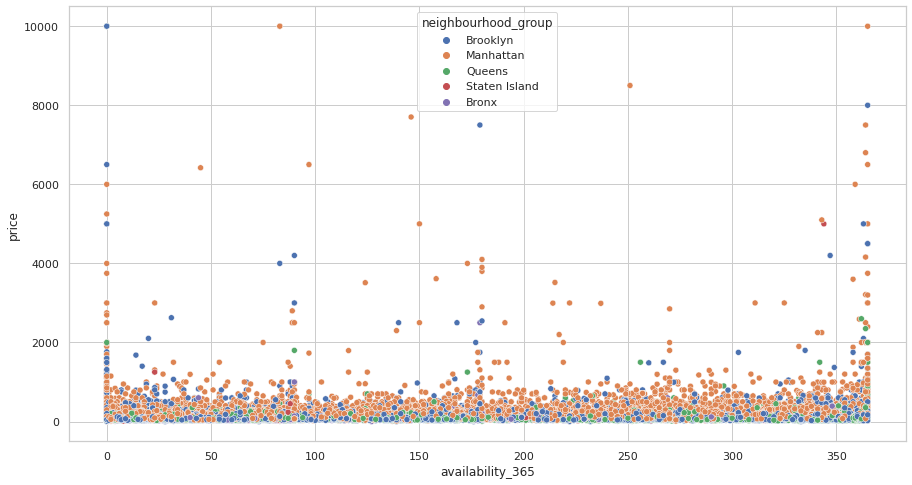

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(y=airbnb_df['price'],x=airbnb_df['availability_365'], hue=airbnb_df['neighbourhood_group'])

### Busiest hosts

In [ ]:
# # groupby on host_name,room_type and neighbourhood_group with max() on number of reviews and sort by number of bookings to get highest number of bookings
busiest_host = airbnb_df.groupby(['host_name','room_type','neighbourhood_group'])['number_of_reviews'].max().reset_index().rename(columns={'number_of_reviews':'number_of_booking'})
top_busiest_host = busiest_host.sort_values(by='number_of_booking',ascending=False).head(10)
top_busiest_host

,host_name,room_type,neighbourhood_group,number_of_booking
4598,Dona,Private room,Queens,629
8445,Jj,Private room,Manhattan,607
12044,Maya,Private room,Queens,543
2869,Carol,Private room,Manhattan,540
3988,Danielle,Private room,Queens,510
1637,Asa,Entire home/apt,Brooklyn,488
18278,Wanda,Private room,Brooklyn,480
10578,Linda,Private room,Queens,474
3935,Dani,Entire home/apt,Brooklyn,467
1179,Angela,Private room,Queens,466


We can plot a bar chart for better understanding and visualization using top_busiest_host dataframe.

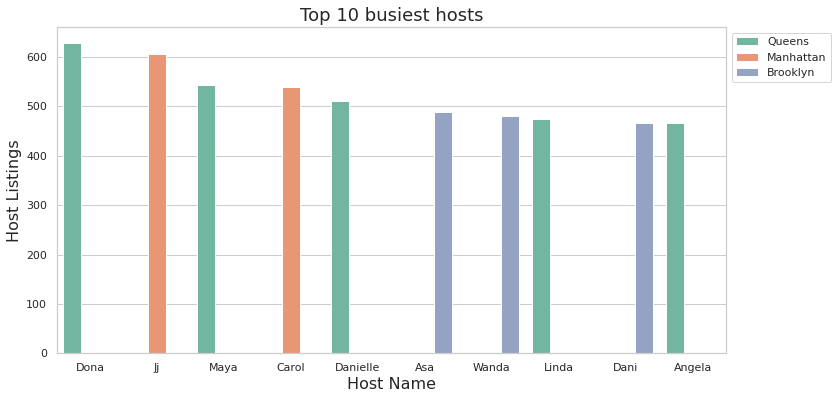

In [ ]:
plt.figure(figsize=(12,6))
fig = sns.barplot(x=top_busiest_host['host_name'],y=top_busiest_host['number_of_booking'],data=top_busiest_host, hue=top_busiest_host['neighbourhood_group'], palette='Set2' )
plt.xlabel("Host Name",fontsize=16)
plt.ylabel("Host Listings",fontsize=16)
plt.title("Top 10 busiest hosts",fontsize=18)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

We can observe from the plot that Dona is busiest Host and this is in Queens, followed by Jj in Manhattan and so on.

**The reason Dona being the busiest:**



In [ ]:
# checking which type of room has most count with the value_count() function on room_type column
pd.DataFrame(top_busiest_host['room_type'].value_counts())

,room_type
Private room,8
Entire home/apt,2


As we can see, majorly hosts have "Private Room" as room_type, so most visitors prefer private rooms.



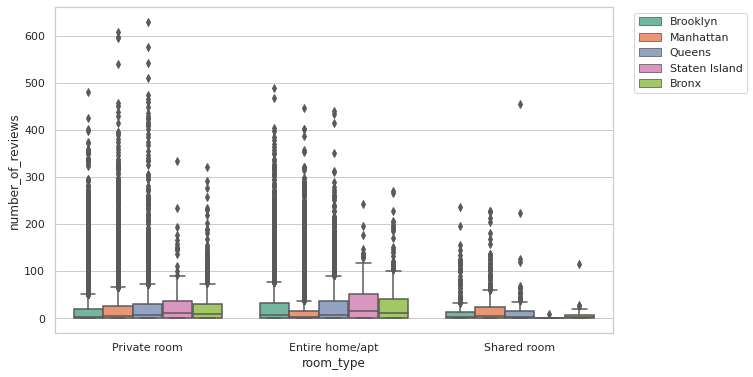

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=airbnb_df, x='room_type',y='number_of_reviews',hue='neighbourhood_group',palette='Set2')
plt.legend(bbox_to_anchor=(1.25, 1))
plt.show()

We can observe that Private Rooms has the most number of reviews and Queens has the most private rooms among all the neighbourhood groups.

In [ ]:
queens_data = airbnb_df.loc[airbnb_df.neighbourhood_group=='Queens']
queens_price = queens_data.groupby(['neighbourhood','room_type'])['price'].mean().reset_index()
queens_price

,neighbourhood,room_type,price
0,Arverne,Entire home/apt,224.625000
1,Arverne,Private room,87.740741
2,Arverne,Shared room,38.000000
3,Astoria,Entire home/apt,142.199475
4,Astoria,Private room,96.178138
...,...,...,...
122,Woodhaven,Private room,53.939394
123,Woodhaven,Shared room,34.500000
124,Woodside,Entire home/apt,148.714286
125,Woodside,Private room,61.777778


### Airbnb Average Price in different neighborhood group

In [ ]:
avg_price = pd.DataFrame(airbnb_df.groupby(['neighbourhood_group'])['price'].mean().sort_values(ascending=False)).reset_index()
avg_price

,neighbourhood_group,price
0,Manhattan,196.875814
1,Brooklyn,124.383207
2,Staten Island,114.812332
3,Queens,99.517649
4,Bronx,87.496792


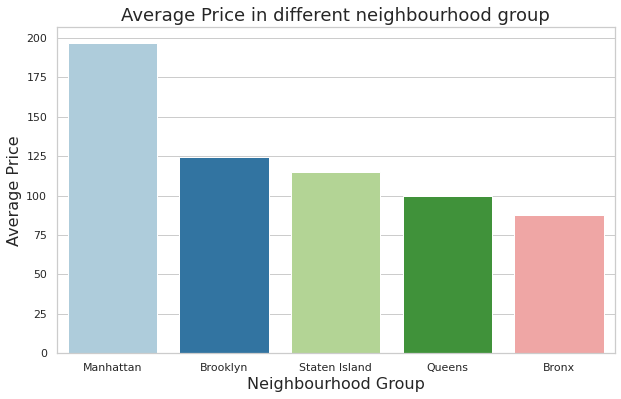

In [ ]:
plt.figure(figsize=(10,6))
fig = sns.barplot(x=avg_price['neighbourhood_group'],y=avg_price['price'],data=avg_price, palette='Paired')
plt.xlabel("Neighbourhood Group",fontsize=16)
plt.ylabel("Average Price",fontsize=16)
plt.title("Average Price in different neighbourhood group",fontsize=18)

plt.show()

We can observe that Manhattan has the most expensive listed Airbnb properties

### Airbnb Average Price for different Room Types

In [ ]:
avg_price_rooms = pd.DataFrame(airbnb_df.groupby(['room_type'])['price'].mean().sort_values(ascending=False)).reset_index()
avg_price_rooms

,room_type,price
0,Entire home/apt,211.794246
1,Private room,89.780973
2,Shared room,70.127586


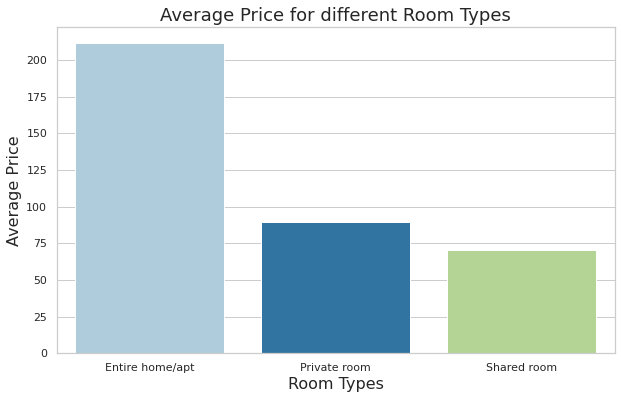

In [ ]:
plt.figure(figsize=(10,6))
fig = sns.barplot(x='room_type',y='price',data=avg_price_rooms, palette='Paired')
plt.xlabel("Room Types",fontsize=16)
plt.ylabel("Average Price",fontsize=16)
plt.title("Average Price for different Room Types",fontsize=18)

plt.show()

We can observe that Entire home/apt is the most expensive Airbnb Room Type

### Airbnb Average Price Per Night in the Queens neighbourhood for different Room Types

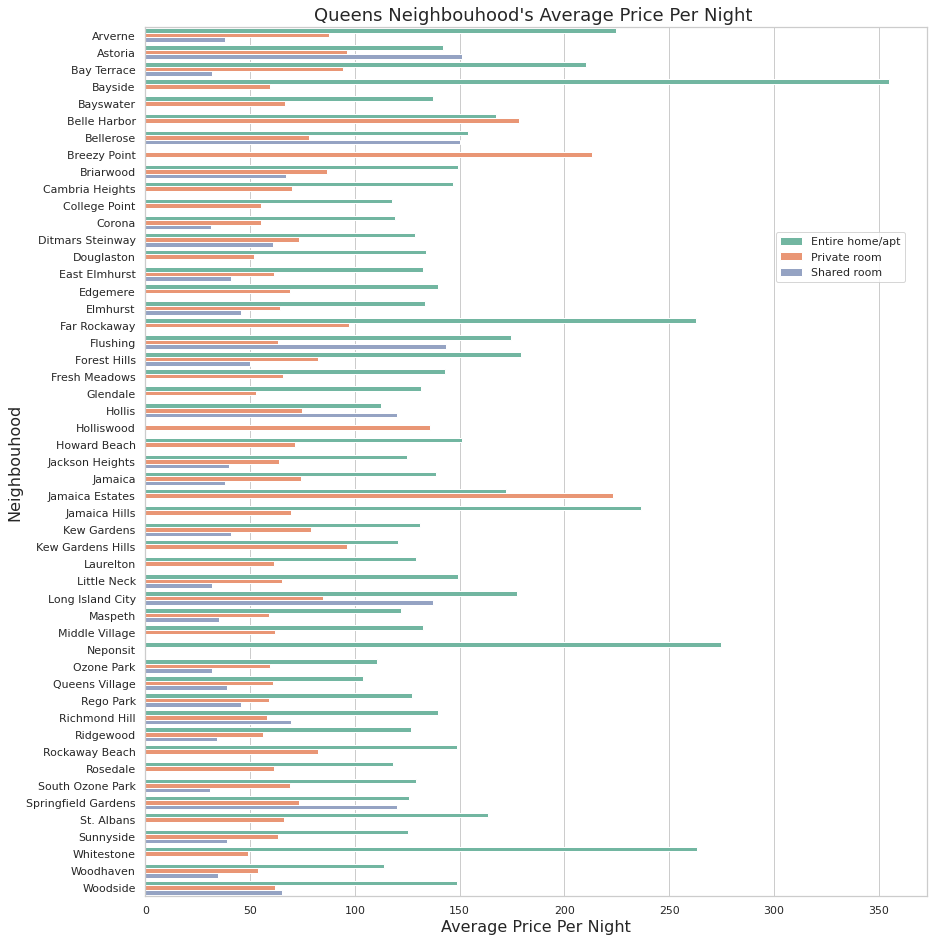

In [ ]:
plt.figure(figsize=(14,16))
fig = sns.barplot(x='price',y='neighbourhood',data=queens_price, hue='room_type', palette='Set2' )
plt.ylabel("Neighbouhood",fontsize=16)
plt.xlabel("Average Price Per Night",fontsize=16)
plt.title("Queens Neighbouhood's Average Price Per Night ",fontsize=18)
plt.legend(bbox_to_anchor=(0.8, 0.7))
plt.show()
plt.show()

### Traffic among different areas



In [ ]:
# neighbourhood group with most traffic
trafic_df = airbnb_df.groupby('neighbourhood_group')['minimum_nights'].count().reset_index().sort_values(by='minimum_nights',ascending=False)
trafic_df

,neighbourhood_group,minimum_nights
2,Manhattan,21661
1,Brooklyn,20104
3,Queens,5666
0,Bronx,1091
4,Staten Island,373


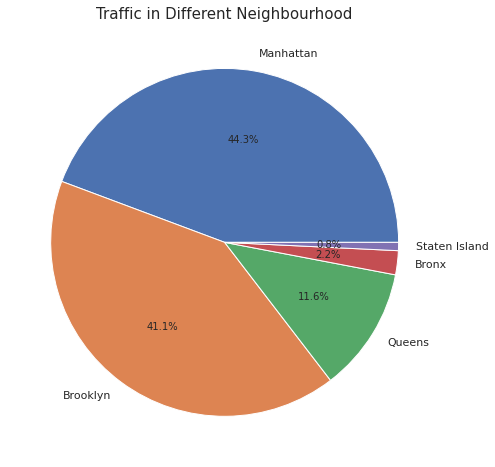

In [ ]:
plt.figure(figsize = (8,8))
plt.pie(trafic_df['minimum_nights'],  labels=trafic_df['neighbourhood_group'], autopct='%1.1f%%')
plt.title('Traffic in Different Neighbourhood',fontsize = 15)
plt.show()

We can observe that Manhattan has the most number of minimum night stayed, so Manhattan is the most Traffic area

### Room types preference of people in traffic area

In [ ]:
#groupby on neighbourhood_group and room_type with aggregation on minimun_nights 
traffic_areas = airbnb_df.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
traffic_areas = traffic_areas.sort_values(by='minimum_nights', ascending=False)
traffic_areas

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,13199
4,Brooklyn,Private room,10132
3,Brooklyn,Entire home/apt,9559
7,Manhattan,Private room,7982
10,Queens,Private room,3372
9,Queens,Entire home/apt,2096
1,Bronx,Private room,652
8,Manhattan,Shared room,480
5,Brooklyn,Shared room,413
0,Bronx,Entire home/apt,379


In [ ]:
# room_type and minimun_nights
room_type_traffic = traffic_areas[traffic_areas['neighbourhood_group']=='Manhattan'].groupby('room_type')['minimum_nights'].sum().reset_index()
room_type_traffic

,room_type,minimum_nights
0,Entire home/apt,13199
1,Private room,7982
2,Shared room,480


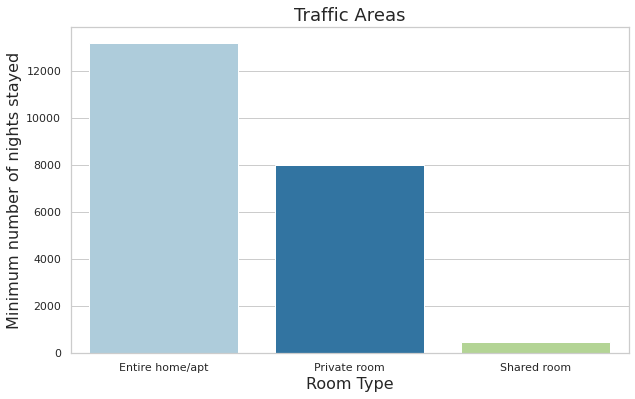

In [ ]:
# Plotting a bar plot for Room Types in Traffic Areas
plt.figure(figsize=(10,6))
fig = sns.barplot(x=room_type_traffic['room_type'],y=room_type_traffic['minimum_nights'],data=room_type_traffic, palette='Paired')
plt.xlabel("Room Type",fontsize=16)
plt.ylabel("Minimum number of nights stayed",fontsize=16)
plt.title("Traffic Areas",fontsize=18)

plt.show()

We can observe that 'Entire home/apt' room type is more demanding in traffic areas as compared to 'private room' and 'shared room'.
And 'shared room' is the least demanding.

### Correlation check

In [ ]:
col_after_excluding = set(airbnb_df.columns) - {'latitude', 'longitude', 'id', 'host_id'}
airbnb_df[col_after_excluding].describe()

,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,price,number_of_reviews
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,7.029962,1.090910,7.143982,112.781327,152.720687,23.274466
std,20.510550,1.597283,32.952519,131.622289,240.154170,44.550582
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,0.040000,1.000000,0.000000,69.000000,1.000000
50%,3.000000,0.370000,1.000000,45.000000,106.000000,5.000000
75%,5.000000,1.580000,2.000000,227.000000,175.000000,24.000000
max,1250.000000,58.500000,327.000000,365.000000,10000.000000,629.000000


In [ ]:
dist_col_list = airbnb_df[col_after_excluding].describe().columns.tolist()


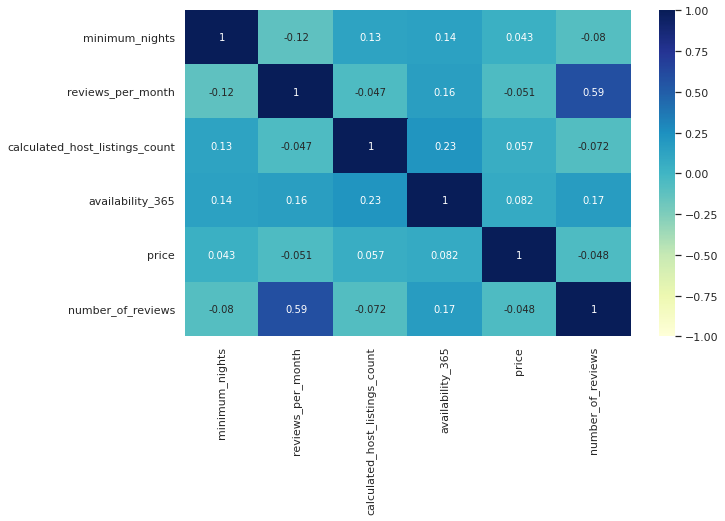

In [ ]:
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(airbnb_df[dist_col_list].corr(), linewidths=0, vmin=-1, annot=True, cmap="YlGnBu")
plt.show()

no_of_reviews and reviews_per_month has high co-relation for obvious reason. But the price column also has very low corelation with other features.

# Conclusion:


*   Host Sonder(NYC) have the most listings and these listings are in Manhattan area.
*   Manhattan has the most number of Airbnb available followed by Brooklyn.

*   As Queens has most reviews so most visitors in Queens followed by Manhattan.

*   Brooklyn and Manhattan neighbourhood groups has maximum price tag on Airbnb and the staten island has low price as compared to Brooklyn and Manhattan.

*   Manhattan has the most expensive Airbnb properties

*   Entire home/apt is the most expensive Airbnb Room Type


*   Dona is busiest Host and this is in Queens, followed by Jj in Manhattan and so on.

*   Private Rooms has the most number of reviews and Queens has the most private rooms among all the neighbourhood groups.

*   Manhattan has the most number of minimum night stayed, so Manhattan is the most Traffic area.

*   'Entire home/apt' room type is more demanding in traffic areas as compared to 'private room' and 'shared room'. And 'shared room' is the least demanding.








